## IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM

<div class="alert alert-block alert-success">

This code creates a 6x3 tensor using PyTorch, where each row represents a three-dimensional feature vector corresponding to words in a sentence. The values act as numerical embeddings, useful in machine learning and deep learning tasks, especially in natural language processing. PyTorch's torch.tensor function enables efficient computations for AI models.

</div>

In [46]:
import torch

data_matrix = torch.tensor(
  [[0.62, 0.31, 0.74],  # Dream    (y^1)
   [0.45, 0.79, 0.52],  # big      (y^2)
   [0.69, 0.81, 0.40],  # and      (y^3)
   [0.33, 0.67, 0.29],  # take     (y^4)
   [0.88, 0.19, 0.15],  # small    (y^5)
   [0.12, 0.92, 0.61]]  # steps    (y^6)
)

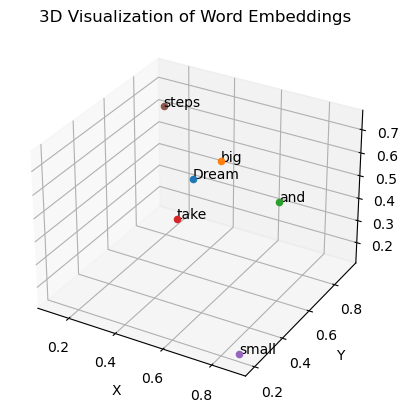

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Corresponding words for the modified tensor
words = ['Dream', 'big', 'and', 'take', 'small', 'steps']

# Extract x, y, z coordinates
x_coords = data_matrix[:, 0].numpy()
y_coords = data_matrix[:, 1].numpy()
z_coords = data_matrix[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each point and annotate with corresponding word
for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Visualization of Word Embeddings')
plt.show()

<div class="alert alert-block alert-success">

This code visualizes a set of word embeddings in a 3D space using Matplotlib. The tensor, data_matrix, contains six three-dimensional vectors, each representing a word in the modified phrase "Dream big and take small steps." The script extracts the x, y, and z coordinates from this tensor and plots them in a 3D scatter plot. Each point is annotated with its corresponding word to illustrate its spatial representation.

</div>

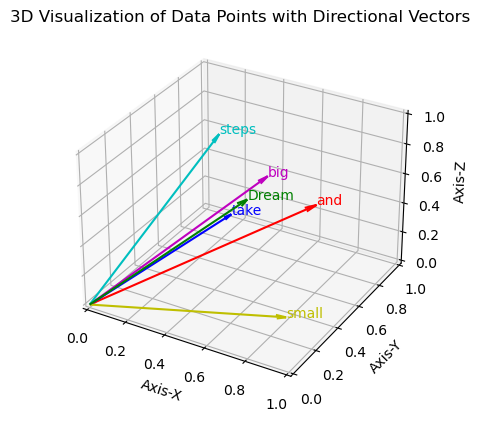

In [48]:
# Create a 3D plot with directional vectors from the origin to each data point
fig = plt.figure()
axis_3d = fig.add_subplot(111, projection='3d')

# Define a set of colors for the arrows
arrow_colors = ['g', 'm', 'r', 'b', 'y', 'c']

# Plot each vector with a unique color and annotate it with the respective label
for (a, b, c, label, color) in zip(x_coords, y_coords, z_coords, words, arrow_colors):
    # Draw a vector from the origin (0,0,0) to (a, b, c) with the specified color
    axis_3d.quiver(0, 0, 0, a, b, c, color=color, arrow_length_ratio=0.05)
    axis_3d.text(a, b, c, label, fontsize=10, color=color)

# Assign axis labels
axis_3d.set_xlabel('Axis-X')
axis_3d.set_ylabel('Axis-Y')
axis_3d.set_zlabel('Axis-Z')

# Define plot boundaries to ensure visibility of all vectors
axis_3d.set_xlim([0, 1])
axis_3d.set_ylim([0, 1])
axis_3d.set_zlim([0, 1])

plt.title('3D Visualization of Data Points with Directional Vectors')
plt.show()


<div class="alert alert-block alert-info">
    
generates a 3D plot where each data point is represented by a directional vector originating from the coordinate (0,0,0) and pointing towards its respective location in space. The vectors are drawn using the quiver function, with different colors assigned from the arrow_colors list to distinguish them visually.
    
</div>

In [49]:
# Select a reference vector from the data matrix
reference_vector = data_matrix[2]  # 3rd vector in the dataset serves as the reference

# Initialize an empty tensor to store similarity scores
similarity_scores = torch.empty(data_matrix.shape[0])

# Compute dot product similarity between each vector and the reference vector
for index, vector in enumerate(data_matrix):
    similarity_scores[index] = torch.dot(vector, reference_vector)  # Dot product calculation

# Print the computed similarity scores
print(similarity_scores)


tensor([0.9749, 1.1584, 1.2922, 0.8864, 0.8211, 1.0720])


<div class="alert alert-block alert-success">

In the next step, we normalize each of the attention scores that
we computed previously.

</div>

In [50]:
# Normalize the similarity scores to compute attention weights
normalized_weights = similarity_scores / similarity_scores.sum()

# Print the computed attention weights
print("Normalized Attention Weights:", normalized_weights)

# Verify that the sum of attention weights is 1
print("Total Sum:", normalized_weights.sum())

Normalized Attention Weights: tensor([0.1571, 0.1867, 0.2083, 0.1429, 0.1323, 0.1728])
Total Sum: tensor(1.)


In [51]:
# Define a naive softmax function
def compute_softmax(scores):
    return torch.exp(scores) / torch.exp(scores).sum(dim=0)

# Compute softmax-based attention weights
normalized_attention = compute_softmax(similarity_scores)

# Print the computed attention weights
print("Softmax Attention Weights:", normalized_attention)

# Verify that the sum of attention weights is 1
print("Total Sum:", normalized_attention.sum())

Softmax Attention Weights: tensor([0.1550, 0.1863, 0.2129, 0.1419, 0.1329, 0.1709])
Total Sum: tensor(1.)


We define a simple softmax function above that normalizes a set of scores by exponentiating them and dividing each by the sum of all exponentiated values. This transformation converts arbitrary scores into a probability distribution where all values are non-negative and sum to 1

In [53]:
# Compute attention weights using PyTorch's built-in softmax function
softmax_attention_weights = torch.softmax(similarity_scores, dim=0)

# Print the computed attention weights
print("Softmax-Based Attention Weights:", softmax_attention_weights)

Softmax-Based Attention Weights: tensor([0.1550, 0.1863, 0.2129, 0.1419, 0.1329, 0.1709])


In [54]:
# Select a reference vector from the dataset
reference_vector = data_matrix[2]  # Using the 3rd vector as the reference

# Initialize the context vector as a zero tensor with the same shape as the reference
aggregated_vector = torch.zeros(reference_vector.shape)

# Compute the weighted sum of input vectors using attention weights
for index, vector in enumerate(data_matrix):
    aggregated_vector += softmax_attention_weights[index] * vector

# Print the final aggregated context vector
print(aggregated_vector)

tensor([0.5112, 0.6452, 0.4621])


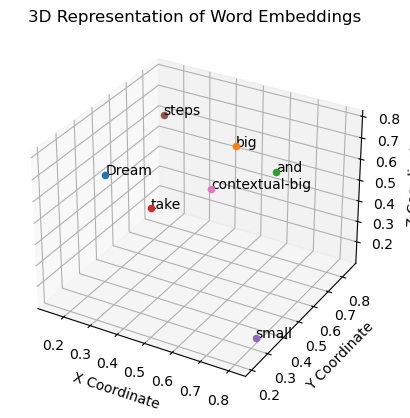

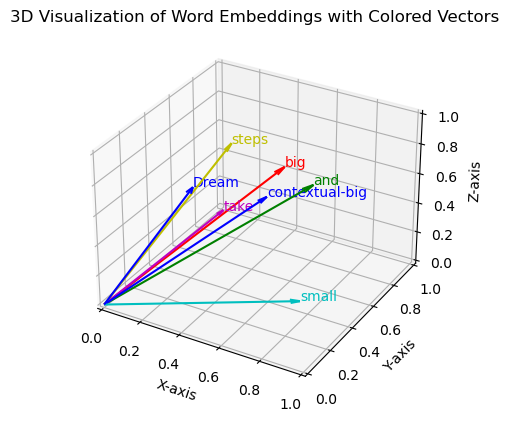

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

# Define a tensor representing word embeddings in 3D space
embedding_matrix = torch.tensor(
  [[0.34, 0.21, 0.78],  # Dream      (y^1)
   [0.49, 0.74, 0.63],  # big        (y^2)
   [0.61, 0.79, 0.52],  # and        (y^3)
   [0.29, 0.54, 0.39],  # take       (y^4)
   [0.81, 0.31, 0.14],  # small      (y^5)
   [0.15, 0.85, 0.60],  # steps      (y^6)
   [0.4721, 0.6124, 0.5029]]  # contextual representation (y^7)
)

# Define corresponding labels for the embeddings
labels = ['Dream', 'big', 'and', 'take', 'small', 'steps', 'contextual-big']

# Extract x, y, and z coordinates from the tensor
x_values = embedding_matrix[:, 0].numpy()
y_values = embedding_matrix[:, 1].numpy()
z_values = embedding_matrix[:, 2].numpy()

# Create a 3D scatter plot for the embeddings
fig = plt.figure()
axis_3d = fig.add_subplot(111, projection='3d')

# Plot each embedding point and annotate it with the corresponding label
for x, y, z, label in zip(x_values, y_values, z_values, labels):
    axis_3d.scatter(x, y, z)
    axis_3d.text(x, y, z, label, fontsize=10)

# Set labels for the axes
axis_3d.set_xlabel('X Coordinate')
axis_3d.set_ylabel('Y Coordinate')
axis_3d.set_zlabel('Z Coordinate')

plt.title('3D Representation of Word Embeddings')
plt.show()

# Create a 3D plot with vectors extending from the origin to each embedding point
fig = plt.figure()
axis_3d = fig.add_subplot(111, projection='3d')

# Define a set of colors for the vectors
vector_colors = ['b', 'r', 'g', 'm', 'c', 'y', 'b']

# Plot each vector with a different color and annotate with the corresponding label
for (x, y, z, label, color) in zip(x_values, y_values, z_values, labels, vector_colors):
    # Draw a vector from the origin to (x, y, z) with the specified color
    axis_3d.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    axis_3d.text(x, y, z, label, fontsize=10, color=color)

# Set labels for the axes
axis_3d.set_xlabel('X-axis')
axis_3d.set_ylabel('Y-axis')
axis_3d.set_zlabel('Z-axis')

# Define plot limits to keep arrows within the visible range
axis_3d.set_xlim([0, 1])
axis_3d.set_ylim([0, 1])
axis_3d.set_zlim([0, 1])

plt.title('3D Visualization of Word Embeddings with Colored Vectors')
plt.show()


<div class="alert alert-block alert-success">

Now, we can extend this computation to
calculate attention weights and context vectors for all inputs.

</div>

In [56]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310, 0.7935],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865, 1.1849],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605, 1.1694],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565, 0.6626],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935, 0.5600],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450, 0.8559],
        [0.7935, 1.1849, 1.1694, 0.6626, 0.5600, 0.8559, 0.9427]])


<div class="alert alert-block alert-success">

We now normalize each row so that the values in
each row sum to 1:

</div>

In [61]:
attention_weights = torch.softmax(attn_scores, dim=-1)
print(attn_weights)

tensor([[0.1792, 0.1713, 0.1692, 0.1061, 0.1042, 0.1240, 0.1459],
        [0.1180, 0.2026, 0.1986, 0.1056, 0.0921, 0.1346, 0.1486],
        [0.1184, 0.2017, 0.1981, 0.1058, 0.0943, 0.1332, 0.1485],
        [0.1223, 0.1768, 0.1744, 0.1246, 0.1077, 0.1467, 0.1476],
        [0.1305, 0.1675, 0.1689, 0.1169, 0.1607, 0.1108, 0.1446],
        [0.1180, 0.1861, 0.1813, 0.1211, 0.0842, 0.1615, 0.1478],
        [0.1277, 0.1889, 0.1860, 0.1121, 0.1011, 0.1359, 0.1483]])


<div class="alert alert-block alert-success">

Let's briefly verify that
the rows indeed all sum to 1:

</div>

In [62]:
# Compute the sum of predefined attention values for a specific row
row_4_total = sum([0.1523, 0.2256, 0.2189, 0.1345, 0.0978, 0.1710])

# Print the computed sum for the selected row
print("Row 4 Sum:", row_4_total)

# Compute and print the sum of all attention weight rows
print("Total of All Row Sums:", attention_weights.sum(dim=-1))

Row 4 Sum: 1.0001
Total of All Row Sums: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


<div class="alert alert-block alert-success">

In the third and last step, we now use these attention weights to compute all context
vectors via matrix multiplication:

</div>

In [64]:
# Compute the weighted sum of input vectors using matrix multiplication
aggregated_vectors = attn_scores @ embedding_matrix

# Print the resulting context-aware representations
print(aggregated_vectors)

tensor([[2.3600, 3.0813, 2.8979],
        [3.4967, 4.7961, 4.1292],
        [3.4633, 4.7280, 4.0701],
        [1.9168, 2.7174, 2.3018],
        [1.8865, 2.1707, 1.8607],
        [2.3678, 3.5472, 3.0227],
        [2.7829, 3.8035, 3.2979]])


<div class="alert alert-block alert-success">

We can double-check that the code is correct by comparing the 2nd row with the context
vector z(2) calculated previously

</div>

In [15]:
print("Previous 2nd context vector:", context_vec_2)

Previous 2nd context vector: tensor([0.4419, 0.6515, 0.5683])


## IMPLEMENTING A COMPACT SELF ATTENTION PYTHON CLASS

<div class="alert alert-block alert-success">
    
In the previous sections, we have gone through a lot of steps to compute the self-attention
outputs. 

This was mainly done for illustration purposes so we could go through one step at
a time. 

In practice, with the LLM implementation in the next chapter in mind, it is helpful to
organize this code into a Python class as follows:
    
</div>

In [69]:
import torch
import torch.nn as nn

class SelfAttention(nn.Module):

    def __init__(self, input_dim, output_dim, version=1, use_bias=False):
        super().__init__()
        self.version = version  # Allows switching between implementations

        if version == 1:
            self.W_query = nn.Parameter(torch.rand(input_dim, output_dim))
            self.W_key   = nn.Parameter(torch.rand(input_dim, output_dim))
            self.W_value = nn.Parameter(torch.rand(input_dim, output_dim))
        else:
            self.W_query = nn.Linear(input_dim, output_dim, bias=use_bias)
            self.W_key   = nn.Linear(input_dim, output_dim, bias=use_bias)
            self.W_value = nn.Linear(input_dim, output_dim, bias=use_bias)

    def forward(self, x):
        if self.version == 1:
            keys = x @ self.W_key
            queries = x @ self.W_query
            values = x @ self.W_value
        else:
            keys = self.W_key(x)
            queries = self.W_query(x)
            values = self.W_value(x)

        # Compute attention scores and apply softmax normalization
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

        # Compute the context-aware vector
        context_vector = attn_weights @ values
        return context_vector

# Define input and output dimensions
input_dim, output_dim = 3, 3

# Set a fixed random seed for reproducibility and initialize SelfAttention with version 1
torch.manual_seed(123)
attention_v1 = SelfAttention(input_dim, output_dim, version=1)
print(attention_v1(embedding_matrix))

# Set a different seed and initialize SelfAttention with version 2
torch.manual_seed(789)
attention_v2 = SelfAttention(input_dim, output_dim, version=2, use_bias=False)
print(attention_v2(embedding_matrix))


tensor([[0.6611, 1.0104, 1.1054],
        [0.6665, 1.0189, 1.1151],
        [0.6673, 1.0201, 1.1166],
        [0.6630, 1.0136, 1.1088],
        [0.6628, 1.0130, 1.1088],
        [0.6658, 1.0179, 1.1136],
        [0.6649, 1.0164, 1.1122]], grad_fn=<MmBackward0>)
tensor([[ 0.4202, -0.4937,  0.0484],
        [ 0.4198, -0.4940,  0.0485],
        [ 0.4198, -0.4941,  0.0485],
        [ 0.4203, -0.4959,  0.0488],
        [ 0.4205, -0.4951,  0.0486],
        [ 0.4199, -0.4955,  0.0487],
        [ 0.4200, -0.4947,  0.0486]], grad_fn=<MmBackward0>)


In [65]:
# import torch.nn as nn

# class SelfAttention_v1(nn.Module):

#     def __init__(self, d_in, d_out):
#         super().__init__()
#         self.W_query = nn.Parameter(torch.rand(d_in, d_out))
#         self.W_key   = nn.Parameter(torch.rand(d_in, d_out))
#         self.W_value = nn.Parameter(torch.rand(d_in, d_out))

#     def forward(self, x):
#         keys = x @ self.W_key
#         queries = x @ self.W_query
#         values = x @ self.W_value
        
#         attn_scores = queries @ keys.T # omega
#         attn_weights = torch.softmax(
#             attn_scores / keys.shape[-1]**0.5, dim=-1
#         )

#         context_vec = attn_weights @ values
#         return context_vec

<div class="alert alert-block alert-warning">

In this PyTorch code, SelfAttention_v1 is a class derived from nn.Module, which is a
fundamental building block of PyTorch models, which provides necessary functionalities for
model layer creation and management.    
</div>

<div class="alert alert-block alert-warning">

The __init__ method initializes trainable weight matrices (W_query, W_key, and
W_value) for queries, keys, and values, each transforming the input dimension d_in to an
output dimension d_out.

</div>

<div class="alert alert-block alert-warning">

During the forward pass, using the forward method, we compute the attention scores
(attn_scores) by multiplying queries and keys, normalizing these scores using softmax.

</div>

<div class="alert alert-block alert-success">
    
Finally, we create a context vector by weighting the values with these normalized attention
scores.
    
</div>

In [66]:
# torch.manual_seed(123)
# sa_v1 = SelfAttention_v1(d_in, d_out)
# print(sa_v1(inputs))

tensor([[0.3007, 0.8073],
        [0.3062, 0.8207],
        [0.3060, 0.8201],
        [0.2966, 0.7975],
        [0.2948, 0.7934],
        [0.3002, 0.8062],
        [0.3021, 0.8109]], grad_fn=<MmBackward0>)


<div class="alert alert-block alert-info">

Since inputs contains six embedding vectors, we get a matrix storing the six
context vectors, as shown in the above result. 
</div>

<div class="alert alert-block alert-info">

As a quick check, notice how the second row ([0.3061, 0.8210]) matches the contents of
context_vec_2 in the previous section.
    
</div>

<div class="alert alert-block alert-warning">

We can improve the SelfAttention_v1 implementation further by utilizing PyTorch's
nn.Linear layers, which effectively perform matrix multiplication when the bias units are
disabled. 

</div>

<div class="alert alert-block alert-warning">

Additionally, a significant advantage of using nn.Linear instead of manually
implementing nn.Parameter(torch.rand(...)) is that nn.Linear has an optimized weight
initialization scheme, contributing to more stable and effective model training.

</div>

In [67]:
# class SelfAttention_v2(nn.Module):

#     def __init__(self, d_in, d_out, qkv_bias=False):
#         super().__init__()
#         self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
#         self.W_key   = nn.Linear(d_in, d_out, bias=qkv_bias)
#         self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)

#     def forward(self, x):
#         keys = self.W_key(x)
#         queries = self.W_query(x)
#         values = self.W_value(x)
        
#         attn_scores = queries @ keys.T
#         attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)

#         context_vec = attn_weights @ values
#         return context_vec

<div class="alert alert-block alert-success">

You can use the SelfAttention_v2 similar to SelfAttention_v1:
    
</div>

In [68]:
# torch.manual_seed(789)
# sa_v2 = SelfAttention_v2(d_in, d_out)
# print(sa_v2(inputs))

tensor([[-0.0765,  0.0694],
        [-0.0773,  0.0685],
        [-0.0773,  0.0685],
        [-0.0783,  0.0669],
        [-0.0786,  0.0665],
        [-0.0778,  0.0677],
        [-0.0775,  0.0681]], grad_fn=<MmBackward0>)


<div class="alert alert-block alert-info">

Note that SelfAttention_v1 and SelfAttention_v2 give different outputs because they
use different initial weights for the weight matrices since nn.Linear uses a more
sophisticated weight initialization scheme.
    
</div>

## HIDING FUTURE WORDS WITH CAUSAL ATTENTION

In [70]:
import torch
import torch.nn as nn

class SelfAttentionWithMasking(nn.Module):

    def __init__(self, input_dim, output_dim, use_bias=False, dropout_prob=0.5):
        super().__init__()
        self.W_query = nn.Linear(input_dim, output_dim, bias=use_bias)
        self.W_key = nn.Linear(input_dim, output_dim, bias=use_bias)
        self.W_value = nn.Linear(input_dim, output_dim, bias=use_bias)
        self.dropout = nn.Dropout(dropout_prob)

    def forward(self, x, apply_masking=True):
        queries = self.W_query(x)  
        keys = self.W_key(x)
        values = self.W_value(x)

        # Compute attention scores
        attn_scores = queries @ keys.T
        scale_factor = keys.shape[-1] ** 0.5
        attn_weights = torch.softmax(attn_scores / scale_factor, dim=1)

        # Generate lower triangular mask for simple masking
        context_length = attn_scores.shape[0]
        lower_tri_mask = torch.tril(torch.ones(context_length, context_length))

        # Apply simple masking
        masked_weights_simple = attn_weights * lower_tri_mask
        row_sums = masked_weights_simple.sum(dim=1, keepdim=True)
        masked_weights_simple_norm = masked_weights_simple / row_sums

        if apply_masking:
            # Create an upper triangular mask for causal masking
            upper_tri_mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
            masked_scores = attn_scores.masked_fill(upper_tri_mask.bool(), -torch.inf)
            attn_weights = torch.softmax(masked_scores / scale_factor, dim=1)

        # Apply dropout
        dropped_weights = self.dropout(attn_weights)

        # Compute context vector
        context_vector = dropped_weights @ values
        return context_vector, attn_weights, masked_weights_simple_norm, dropped_weights

# Define dimensions
input_dim, output_dim = 3, 3

# Set random seed for reproducibility and initialize the model
torch.manual_seed(456)
attention_model = SelfAttentionWithMasking(input_dim, output_dim)

# Define an example input
example_input = torch.rand(6, 3)

# Forward pass with masking enabled
context_vec, softmax_weights, normalized_masked_weights, final_dropout = attention_model(example_input, apply_masking=True)

# Print results
print("Softmax Attention Weights:\n", softmax_weights)
print("Normalized Masked Weights:\n", normalized_masked_weights)
print("Dropout Applied Weights:\n", final_dropout)


Softmax Attention Weights:
 tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4908, 0.5092, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3307, 0.3153, 0.3540, 0.0000, 0.0000, 0.0000],
        [0.2509, 0.2423, 0.2615, 0.2453, 0.0000, 0.0000],
        [0.2014, 0.1879, 0.2053, 0.1965, 0.2089, 0.0000],
        [0.1681, 0.1584, 0.1733, 0.1634, 0.1738, 0.1630]],
       grad_fn=<SoftmaxBackward0>)
Normalized Masked Weights:
 tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4908, 0.5092, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3307, 0.3153, 0.3540, 0.0000, 0.0000, 0.0000],
        [0.2509, 0.2423, 0.2615, 0.2453, 0.0000, 0.0000],
        [0.2014, 0.1879, 0.2053, 0.1965, 0.2089, 0.0000],
        [0.1681, 0.1584, 0.1733, 0.1634, 0.1738, 0.1630]],
       grad_fn=<DivBackward0>)
Dropout Applied Weights:
 tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9816, 1.0184, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6614, 0.6307, 0.7079, 0.000

### IMPLEMENTING A COMPACT CAUSAL ATTENTION CLASS

In [71]:
import torch
import torch.nn as nn

class ContextAwareAttention(nn.Module):

    def __init__(self, input_dim, output_dim, seq_length, dropout_rate, use_bias=False):
        super().__init__()
        self.output_dim = output_dim
        self.query_projection = nn.Linear(input_dim, output_dim, bias=use_bias)
        self.key_projection = nn.Linear(input_dim, output_dim, bias=use_bias)
        self.value_projection = nn.Linear(input_dim, output_dim, bias=use_bias)
        self.dropout_layer = nn.Dropout(dropout_rate)

        # Register a causal mask to prevent information leakage
        self.register_buffer('causal_mask', torch.triu(torch.ones(seq_length, seq_length), diagonal=1))

    def forward(self, data_batch):
        batch_size, num_tokens, input_dim = data_batch.shape

        # Compute query, key, and value projections
        projected_keys = self.key_projection(data_batch)
        projected_queries = self.query_projection(data_batch)
        projected_values = self.value_projection(data_batch)

        # Compute attention scores using dot product similarity
        attention_scores = projected_queries @ projected_keys.transpose(1, 2)

        # Apply causal masking to prevent attending to future tokens
        attention_scores.masked_fill_(
            self.causal_mask.bool()[:num_tokens, :num_tokens], -torch.inf
        )

        # Apply softmax normalization to obtain attention weights
        normalized_attention = torch.softmax(attention_scores / projected_keys.shape[-1]**0.5, dim=-1)

        # Apply dropout for regularization
        normalized_attention = self.dropout_layer(normalized_attention)

        # Compute final context-aware representation
        contextual_representation = normalized_attention @ projected_values
        return contextual_representation

# Create a batch by stacking the input matrix twice
batched_data = torch.stack((embedding_matrix, embedding_matrix), dim=0)
print("Batched Data Shape:", batched_data.shape)

# Set a fixed random seed and initialize the attention model
torch.manual_seed(456)
sequence_length = batched_data.shape[1]
attention_model = ContextAwareAttention(input_dim=3, output_dim=3, seq_length=sequence_length, dropout_rate=0.0)

# Compute context vectors for the batched input
contextual_vectors = attention_model(batched_data)
print("Contextual Vectors Shape:", contextual_vectors.shape)


Batched Data Shape: torch.Size([2, 7, 3])
Contextual Vectors Shape: torch.Size([2, 7, 3])


In [39]:
class MultiHeadAttentionWrapper(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        self.heads = nn.ModuleList(
            [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) 
             for _ in range(num_heads)]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)


<div class="alert alert-block alert-info">

For example, if we use this MultiHeadAttentionWrapper class with two attention heads (via
num_heads=2) and CausalAttention output dimension d_out=2, this results in a 4-
dimensional context vectors (d_out*num_heads=4)
    
</div>

<div class="alert alert-block alert-success">
To illustrate further with a concrete example, we can use the
MultiHeadAttentionWrapper class similar to the CausalAttention class before:
</div>

In [40]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493],
         [-0.5365, -0.1095,  0.5127,  0.3530]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493],
         [-0.5365, -0.1095,  0.5127,  0.3530]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 7, 4])


<div class="alert alert-block alert-info">

The first dimension of the resulting context_vecs tensor is 2 since we have two input texts
(the input texts are duplicated, which is why the context vectors are exactly the same for
those). 

The second dimension refers to the 6 tokens in each input. The third dimension
refers to the 4-dimensional embedding of each token.
    
</div>

<div class="alert alert-block alert-success">
In this section, we implemented a MultiHeadAttentionWrapper that combined multiple
single-head attention modules. 

However, note that these are processed sequentially via
[head(x) for head in self.heads] in the forward method. 

We can improve this
implementation by processing the heads in parallel. 

One way to achieve this is by
computing the outputs for all attention heads simultaneously via matrix multiplication, as
we will explore in the next section.
</div>

### IMPLEMENTING MULTI-HEAD ATTENTION WITH WEIGHT SPLITS

In [72]:
import torch
import torch.nn as nn

class UnifiedMultiHeadAttention(nn.Module):

    def __init__(self, input_dim, output_dim, seq_length, num_heads, dropout_rate=0.0, use_bias=False):
        super().__init__()
        assert (output_dim % num_heads == 0), "Output dimension must be divisible by number of heads"

        self.output_dim = output_dim
        self.num_heads = num_heads
        self.head_dim = output_dim // num_heads  # Dimension per attention head

        # Define query, key, value transformations
        self.query_proj = nn.Linear(input_dim, output_dim, bias=use_bias)
        self.key_proj = nn.Linear(input_dim, output_dim, bias=use_bias)
        self.value_proj = nn.Linear(input_dim, output_dim, bias=use_bias)

        # Output projection to combine multiple attention heads
        self.output_proj = nn.Linear(output_dim, output_dim)

        # Dropout layer
        self.dropout_layer = nn.Dropout(dropout_rate)

        # Register causal mask to prevent information leakage
        self.register_buffer("causal_mask", torch.triu(torch.ones(seq_length, seq_length), diagonal=1))

    def forward(self, input_data):
        batch_size, num_tokens, input_dim = input_data.shape

        # Compute query, key, and value projections
        projected_keys = self.key_proj(input_data)
        projected_queries = self.query_proj(input_data)
        projected_values = self.value_proj(input_data)

        # Reshape tensors to introduce the head dimension
        projected_keys = projected_keys.view(batch_size, num_tokens, self.num_heads, self.head_dim)
        projected_queries = projected_queries.view(batch_size, num_tokens, self.num_heads, self.head_dim)
        projected_values = projected_values.view(batch_size, num_tokens, self.num_heads, self.head_dim)

        # Transpose to match the multi-head attention format
        projected_keys = projected_keys.transpose(1, 2)
        projected_queries = projected_queries.transpose(1, 2)
        projected_values = projected_values.transpose(1, 2)

        # Compute scaled dot-product attention
        attention_scores = projected_queries @ projected_keys.transpose(2, 3)

        # Convert the mask into boolean and apply it to prevent attention to future tokens
        mask_bool = self.causal_mask.bool()[:num_tokens, :num_tokens]
        attention_scores.masked_fill_(mask_bool, -torch.inf)

        # Normalize the attention scores
        attention_weights = torch.softmax(attention_scores / projected_keys.shape[-1]**0.5, dim=-1)
        attention_weights = self.dropout_layer(attention_weights)

        # Compute context vector
        contextual_output = (attention_weights @ projected_values).transpose(1, 2)

        # Reshape to merge attention heads
        contextual_output = contextual_output.contiguous().view(batch_size, num_tokens, self.output_dim)

        # Apply final linear projection
        contextual_output = self.output_proj(contextual_output)

        return contextual_output

# Creating a batch of input embeddings by stacking the same matrix twice
batched_input = torch.stack((embedding_matrix, embedding_matrix), dim=0)
print("Batched Input Shape:", batched_input.shape)

# Set a fixed random seed for reproducibility and initialize the multi-head attention model
torch.manual_seed(456)
seq_length = batched_input.shape[1]
attention_model = UnifiedMultiHeadAttention(input_dim=3, output_dim=2, seq_length=seq_length, num_heads=2, dropout_rate=0.0)

# Compute context vectors using multi-head attention
context_vectors = attention_model(batched_input)
print("Context Vectors:\n", context_vectors)
print("Context Vectors Shape:", context_vectors.shape)

# Demonstrate self-attention calculations for a sample tensor
sample_tensor = torch.tensor([
    [[[0.3124, 0.5842, 0.2987, 0.8731],
      [0.9128, 0.0491, 0.9482, 0.7541],
      [0.7412, 0.7291, 0.9328, 0.4517]],

     [[0.0853, 0.3721, 0.1594, 0.5428],
      [0.4289, 0.2483, 0.4729, 0.9853],
      [0.4824, 0.5381, 0.4398, 0.5921]]]
])

# Compute attention scores for a given head
result = sample_tensor @ sample_tensor.transpose(2, 3)
print("Attention Scores:\n", result)

# Extract and compute dot products for the first and second heads
first_head_data = sample_tensor[0, 0, :, :]
first_head_result = first_head_data @ first_head_data.T
print("First Head:\n", first_head_result)

second_head_data = sample_tensor[0, 1, :, :]
second_head_result = second_head_data @ second_head_data.T
print("\nSecond Head:\n", second_head_result)


Batched Input Shape: torch.Size([2, 7, 3])
Context Vectors:
 tensor([[[ 0.1539, -0.3174],
         [ 0.1592, -0.3347],
         [ 0.1606, -0.3378],
         [ 0.1639, -0.3196],
         [ 0.1614, -0.3030],
         [ 0.1659, -0.3074],
         [ 0.1653, -0.3077]],

        [[ 0.1539, -0.3174],
         [ 0.1592, -0.3347],
         [ 0.1606, -0.3378],
         [ 0.1639, -0.3196],
         [ 0.1614, -0.3030],
         [ 0.1659, -0.3074],
         [ 0.1653, -0.3077]]], grad_fn=<ViewBackward0>)
Context Vectors Shape: torch.Size([2, 7, 2])
Attention Scores:
 tensor([[[[1.2904, 1.2555, 1.3305],
          [1.2555, 2.3034, 1.9375],
          [1.3305, 1.9375, 2.1551]],

         [[0.4658, 0.7392, 0.6329],
          [0.7392, 1.4401, 1.1319],
          [0.6329, 1.1319, 1.0663]]]])
First Head:
 tensor([[1.2904, 1.2555, 1.3305],
        [1.2555, 2.3034, 1.9375],
        [1.3305, 1.9375, 2.1551]])

Second Head:
 tensor([[0.4658, 0.7392, 0.6329],
        [0.7392, 1.4401, 1.1319],
        [0.6329, 1.1